# Exercise 1:  IMDB csv data

## Challenge: Using the file "resources/imdb.csv", find out whether Action movies are better or worse than Romance movies.

**Complication** the csv file (an excerpt from one used in a Kaggle challenge) has a slightly unusual format - commas in text fields are escaped with a "\\" character.  This might upset your csv parser.

First, lets check the file is there, and how many rows it has:

In [1]:
import os
filename = "resources/imdb.csv"
if not os.path.exists(filename):
    print("Not there!")
else:
    print(len(open(filename).readlines()))

4000


OK, so, we'll just load this csv file into pandas...

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv(filename)

ParserError: Error tokenizing data. C error: Expected 44 fields in line 66, saw 46


Hmmm.... that didn't work...  let's dig a bit deeper, using python's csv "sniffer"

In [4]:
import csv
with open(filename) as csvfile:
    dialect = csv.Sniffer().sniff(csvfile.read())
    csvfile.seek(0)
    reader = csv.reader(csvfile, dialect)
    rows = list(reader)
print("Found {} rows".format(len(rows)))

Found 3896 rows


That did something, but only 3896 rows rather than 4000...

Let's try *clevercsv* instead


In [5]:
!pip install clevercsv


In [6]:
import clevercsv as csv
with open(filename) as csvfile:
    dialect = csv.Sniffer().sniff(csvfile.read())
    csvfile.seek(0)
    reader = csv.reader(csvfile, dialect)
    rows = list(reader)
print("Found {} rows".format(len(rows)))

Found 4000 rows


Great!  Now let's turn that into a pandas dataframe, remembering that the first row is the column headers.

In [7]:
df = pd.DataFrame(rows[1:],columns=rows[0])
df

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550,3240,1921,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319,5700,1925,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007,9180,1927,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521,6420,1926,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057,5220,1931,video.movie,...,0,0,1,0,0,0,0,0,0,0
5,titles01/tt0022100,tt0022100,M (1931),m,http://www.imdb.com/title/tt0022100/,8.5,73726,7020,1931,video.movie,...,0,0,0,0,0,0,0,1,0,0
6,titles01/tt0025316,tt0025316,Es geschah in einer Nacht (1934),es geschah in einer nacht,http://www.imdb.com/title/tt0025316/,8.3,46503,6300,1934,video.movie,...,0,0,1,0,0,0,0,0,0,0
7,titles01/tt0027977,tt0027977,Moderne Zeiten (1936),moderne zeiten,http://www.imdb.com/title/tt0027977/,8.6,90847,5220,1936,video.movie,...,0,0,0,0,0,0,0,0,0,0
8,titles01/tt0031381,tt0031381,Vom Winde verweht (1939),vom winde verweht,http://www.imdb.com/title/tt0031381/,8.2,160414,14280,1939,video.movie,...,0,0,1,0,0,0,0,0,1,0
9,titles01/tt0031679,tt0031679,Mr. Smith geht nach Washington (1939),mr smith geht nach washington,http://www.imdb.com/title/tt0031679/,8.4,58169,7740,1939,video.movie,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.columns

Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')

So it looks like "imdbRating" is the number we want, and there is a column containing 0 or 1 for each genre of film (a film can belong to more than one genre).

First let's check the *type* of the imdbRating column:

In [9]:
df['imdbRating'].dtype

dtype('O')

Looks like it is "O" for "Object", but we want it to be a number

In [10]:
df["imdbRating"] = pd.to_numeric(df["imdbRating"])

In [11]:
df['imdbRating'].dtype

dtype('float64')

Having done this, any missing values in this column should be NaN now, and we can filter on this.  

Let's see if the distribution of "type" of the record is different for those that do and don't have imdbRating values:

In [12]:
df_rating = df[df['imdbRating'].notnull()]
df_rating.shape

(3933, 44)

In [13]:
df_norating = df[df['imdbRating'].isnull()]
df_norating.shape

(66, 44)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

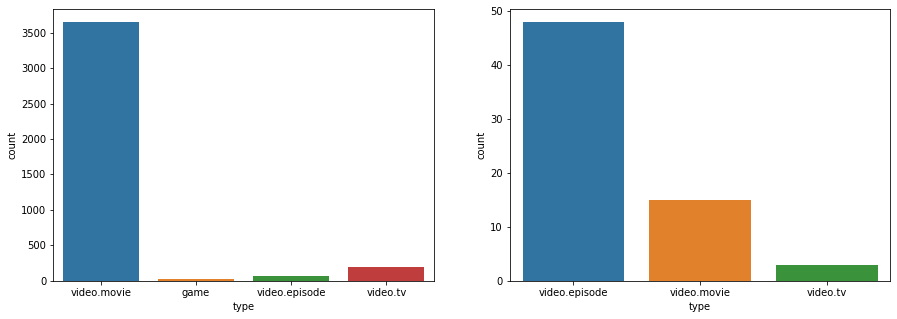

In [15]:
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.countplot(df_rating['type'],ax=axes[0])
sns.countplot(df_norating['type'],ax=axes[1])

OK, so most records that do have ratings are movies, and most that don't are "episodes".  We only care about movies, so that's good news.   
However, we should look at what genres the ~15 movies that don't have ratings belong to:

In [16]:
genres = ["Action","Romance"]

In [17]:
movie_filter = df_norating["type"]=="video.movie"
df_movie_norating = df_norating[movie_filter]
df_movie_norating.shape

(15, 44)

In [18]:
for genre in genres:
    print("Number of {} movies with no rating is {}".format(
        genre,
        pd.to_numeric(df_movie_norating[genre]).sum()))
    

Number of Action movies with no rating is 1
Number of Romance movies with no rating is 0


Now lets do the same for movies that do have ratings:

In [19]:
is_movie = df_rating['type']=='video.movie'
df_movie_rating = df_rating[is_movie]
for genre in genres:
    print("Number of {} movies with a valid rating is {}".format(
        genre,
        pd.to_numeric(df_movie_rating[genre]).sum()))

Number of Action movies with a valid rating is 691
Number of Romance movies with a valid rating is 591


OK, so there are no Romance movies, and only one Action movie, that don't have a rating.  We can safely remove this record and ignore it.

(array([   7.,    6.,   20.,   33.,  119.,  351.,  904., 1327.,  829.,
          54.]),
 array([1.5 , 2.28, 3.06, 3.84, 4.62, 5.4 , 6.18, 6.96, 7.74, 8.52, 9.3 ]),
 <a list of 10 Patch objects>)

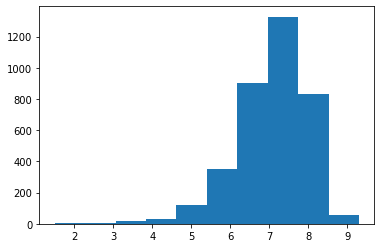

In [20]:
plt.hist(df_movie_rating['imdbRating'])

In [21]:
df_by_genre = []
for genre in genres:
    filt_df = df_movie_rating[genre]=='1'
    df_by_genre.append(df_movie_rating[filt_df])
len(genres)

2

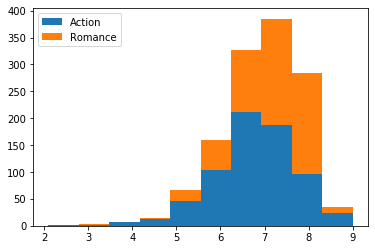

In [22]:
plt.hist([df_by_genre[i]['imdbRating'] for i in range(len(genres))],label=genres,stacked=True)
plt.legend(prop={'size':10})

In [23]:
for i, genre in enumerate(genres):
    print(" {}: mean: {}, std: {}, max: {}".format(genre, 
                                                   df_by_genre[i]['imdbRating'].mean(), 
                                                   df_by_genre[i]['imdbRating'].std(), 
                                                   df_by_genre[i]['imdbRating'].max()))

 Action: mean: 6.770622286541244, std: 0.9576947203653332, max: 9.0
 Romance: mean: 7.192216582064298, std: 0.7983077401152759, max: 8.8


So, the mean for Romance movies is slightly higher, but the standard deviation for both is quite large.  It looks from the plot as though there are a lot more Action movies with ratings of 5 or lower, and a lot more Romance movies with ratings around 7 or 8.

BUT, the very best movie is an Action movie.  
(bonus points if you can find which one it is...)